# 決定論力学系

# logistic 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def logistic(r,x):
    return r*x*(1-x)


In [3]:
n=1000
r=np.linspace(2.5,4.0,n)

In [4]:
iterations=1000
last=500

In [6]:
x=1e-5 * np.ones(n)

In [7]:
lyapunov=np.empty(n)

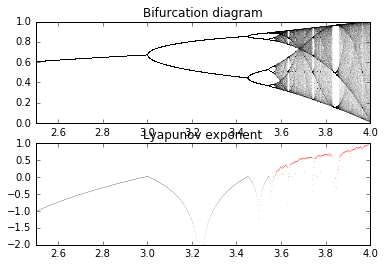

In [10]:
plt.subplot(211)
for i in range(iterations):
    x=logistic(r,x)
    #we compute the partial sum of the
    #Lyapunov exponent
    lyapunov+=np.log(abs(r-2*r*x))
    #we display the bifurcation diagram
    if i>=(iterations-last):
        plt.plot(r,x,',k',alpha=0.02)
plt.xlim(2.5,4.)
plt.title("Bifurcation diagram")

#we display the Lyapunov exponent.
plt.subplot(212)
plt.plot(r[lyapunov<0],lyapunov[lyapunov<0]/iterations,',k',alpha=0.1)
plt.plot(r[lyapunov>=0],lyapunov[lyapunov>=0]/iterations,',r',alpha=0.25)
plt.xlim(2.5,4.0)
plt.ylim(-2,1)
plt.title("Lyapunov exponent")


# cell automaton

In [13]:
u=np.array([[4],[2],[1]])
def step(x,rule_binary):
    """Compute a single step of an elementary cellular automaton"""
    #The columns contain the L,C,R values of all cells.
    y=np.vstack((np.roll(x,1),x,np.roll(x,-1))).astype(np.int8)
    #we get the LCR pattern numbers between 0 and 7
    z=np.sum(y*u,axis=0).astype(np.int8)
    #we got the patterns given by the rule.
    return rule_binary[7-z]

In [17]:
def generate(rule,size=80,steps=80):
    """Simulate an elementary cellular automaton given its rule (number between 0 and 255)"""
    #Compute the binary representation of the rule
    rule_binary=np.array([int(x) for x in np.binary_repr(rule,8)],dtype=np.int8)
    x=np.zeros((steps,size),dtype=np.int8)
    #Random initial state.
    x[0,:]=np.random.rand(size) <0.5
    #Apply the step function iteratively.
    for i in range(steps-1):
        x[i+1,:] = step(x[i,:],rule_binary)
    return x

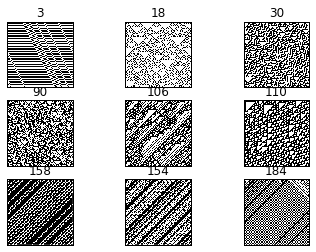

In [19]:
rules=[3,18,30,90,106,110,158,154,184]
for i,rule in enumerate(rules):
    x=generate(rule)
    plt.subplot(331+i)
    plt.imshow(x,interpolation='none',cmap=plt.cm.binary)
    plt.xticks([]);plt.yticks([])
    plt.title(str(rule))